In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("customer_churn.csv")

In [3]:
df['customer_5']=df.iloc[:,4]

In [4]:
df['customer_15']=df.iloc[:,14]


In [5]:
senior_male_electronic=df.loc[(df['gender']=='Male')& (df['PaymentMethod']=='Electronic check')]

In [6]:
customer_total_tenure=df.loc[(df['tenure']>70)|(df['MonthlyCharges']>100)]

In [7]:
two_mail_yes=df.loc[(df['Contract']=='Two year') & (df['PaymentMethod']=='Mailed check')&(df['Churn']=='Yes')]

In [8]:
customer_333=df.sample(333)

In [9]:
count = df.groupby(['Churn']).count() 

[Text(0, 0.5, 'Count of Categories'),
 Text(0.5, 0, 'Categories of Internet Service')]

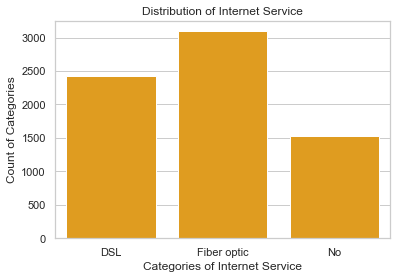

In [10]:
sns.set(style="whitegrid")
ax = sns.countplot(df['InternetService'], color='Orange')
ax.set_title("Distribution of Internet Service")
ax.set(xlabel='Categories of Internet Service', ylabel='Count of Categories')

Text(0.5, 1.0, 'Distribution of Tenure')

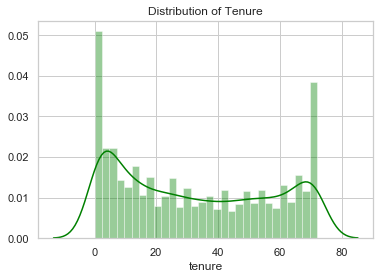

In [11]:
ax=sns.distplot(df.tenure,bins=30,color='green')
ax.set_title("Distribution of Tenure")

[Text(0, 0.5, 'Monthly Charges of customer'),
 Text(0.5, 0, 'Tenure of customer')]

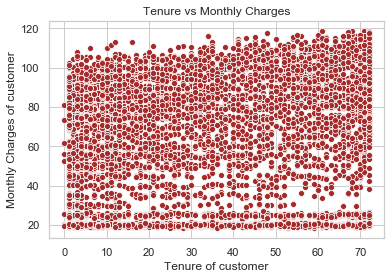

In [12]:
ax1=sns.scatterplot('tenure','MonthlyCharges',data=df, color='brown')
ax1.set_title("Tenure vs Monthly Charges")
ax1.set(xlabel="Tenure of customer", ylabel="Monthly Charges of customer")

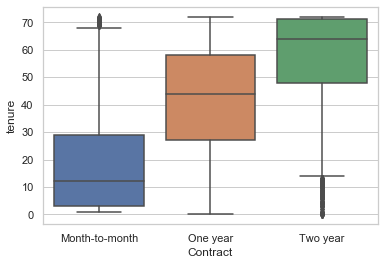

In [13]:
ax=sns.boxplot('Contract','tenure',data=df)

In [14]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df[['MonthlyCharges']],df.tenure,test_size=0.3)

In [15]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
y_pred = regr.predict(X_test)

In [17]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [0.20982924]


Root Mean squared error: 23.86
Coefficient of determination: 0.05


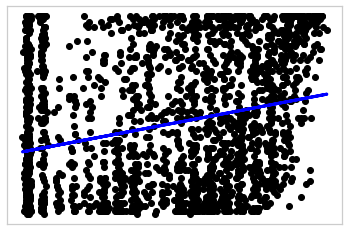

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

# The Root mean squared error
print('Root Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred, squared=False))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [19]:
df.Churn

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

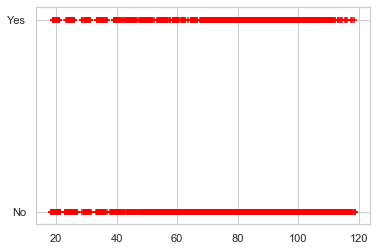

In [20]:
plt.scatter(df.MonthlyCharges,df.Churn, marker='+', color='red')

In [21]:
X_train, X_test, y_train, y_test=train_test_split(df[['MonthlyCharges']],df.Churn,test_size=0.35)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=42)
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
y_pred=model.predict(X_test)

In [23]:
model.score(X_test,y_test)

0.7360097323600974

In [24]:
model.predict_proba(X_test)


array([[0.78541903, 0.21458097],
       [0.83710477, 0.16289523],
       [0.81418051, 0.18581949],
       ...,
       [0.75852972, 0.24147028],
       [0.85849169, 0.14150831],
       [0.79874589, 0.20125411]])

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
confusion_matrix(y_test, y_pred)

array([[1815,    0],
       [ 651,    0]], dtype=int64)

In [26]:
accuracy_score(y_test, y_pred)

0.7360097323600974

In [33]:
x=df[['MonthlyCharges','tenure']]
y=df[['Churn']]


In [35]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.20)


In [36]:
from sklearn.linear_model import LogisticRegression
model_multi=LogisticRegression(random_state=42)
model.fit(X_train,y_train)


C:\Users\PANKAJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
y_predML=model_multi.predict(X_test)

In [38]:
confusion_matrix(y_test, y_predML)

array([[945, 105],
       [200, 159]], dtype=int64)

In [39]:
accuracy_score(y_test, y_predML)

0.7835344215755855

In [40]:
x=df[['tenure']]
y=df[['Churn']]


In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.20)


In [45]:
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [48]:
y_pred=tree.predict(X_test)

In [50]:
confusion_matrix(y_test, y_pred)


array([[955,  69],
       [281, 104]], dtype=int64)

In [51]:
accuracy_score(y_test, y_pred)

0.751596877217885

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=120)
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.20)


In [74]:
rf.fit(X_train,y_train)

C:\Users\PANKAJ\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
y_pred=rf.predict(X_test)

In [76]:
confusion_matrix(y_test, y_pred)


array([[988,  68],
       [269,  84]], dtype=int64)

In [77]:
accuracy_score(y_test, y_pred)

0.7608232789212207